In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [4]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby(['source']).sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Persons - Pierce County

In [5]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['psexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='psexpfac')

source,model,survey
County,,
Pierce,"851,709","850,387"


# Total Persons - Other Counties

In [6]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='psexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"2,149,234","2,161,738"
Kitsap,"257,159","249,302"
Snohomish,"795,052","789,822"
All,"3,201,445","3,200,862"


# Total Households

In [7]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


## Pierce County

In [8]:
df = load_data('auto_ownership')
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='hhexpfac')

source,model,survey
County,,
Pierce,"323,804","339,240"


## Other Counties

In [9]:
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='hhexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"884,650","915,410"
Kitsap,"101,859","99,071"
Snohomish,"294,950","302,792"
All,"1,281,459","1,317,272"


# Total Trips

In [10]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,254,676","15,766,214"


## Pierce County

In [11]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='trexpfac')

source,model,survey
County,,
Pierce,"3,205,776","2,998,553"


## Other Counties

In [12]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='trexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"8,948,504","8,813,594"
Kitsap,"989,530","974,117"
Snohomish,"3,110,866","2,979,950"
All,"13,048,900","12,767,661"


# Total Tours

In [13]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,407,371","6,807,631"


## Pierce County

In [14]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='toexpfac')

source,model,survey
County,,
Pierce,"1,267,914","1,334,376"


## Other Counties

In [15]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='toexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"3,524,694","3,663,281"
Kitsap,"390,172","502,309"
Snohomish,"1,224,591","1,307,664"
All,"5,139,457","5,473,255"


## Average Household Size

In [16]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Pierce County

In [17]:
for county, df_county in df.groupby('person_county'):
    if county=='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

Pierce County
        avg_hh_size
source             
model          2.63
survey         2.51


## Other Counties

In [18]:
for county, df_county in df.groupby('person_county'):
    if county!='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

King County
        avg_hh_size
source             
model          2.43
survey         2.36
Kitsap County
        avg_hh_size
source             
model          2.52
survey         2.52
Snohomish County
        avg_hh_size
source             
model          2.70
survey         2.61


## Average Trips per Person

In [46]:
df_person = load_data('person_type')
df_person = df_person.groupby(['person_county', 'source'], as_index=False)['psexpfac'].sum()
df = load_data('trip_total')
df = df.join(df_person.set_index(['person_county', 'source']), on=['person_county', 'source'], how='left')
for county, df_county in df.groupby('person_county'):
    if county=='Pierce':
        print(county + ' County')
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))

Pierce County
source      model  survey
mode                     
Bike         0.06    0.01
HOV2         0.93    0.86
HOV3+        0.65    0.56
SOV          1.57    1.67
School Bus   0.08    0.07
TNC          0.03    0.00
Transit      0.04    0.07
Walk         0.40    0.24


In [48]:
for county, df_county in df.groupby('person_county'):
    if county!='Pierce':
        print('\n' + county + ' County')
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))


King County
source      model  survey
mode                     
Bike         0.07    0.06
HOV2         0.91    0.88
HOV3+        0.62    0.60
SOV          1.68    1.59
School Bus   0.08    0.05
TNC          0.05    0.02
Transit      0.16    0.21
Walk         0.60    0.63

Kitsap County
source      model  survey
mode                     
Bike         0.05    0.00
HOV2         0.93    1.10
HOV3+        0.61    0.62
SOV          1.63    1.91
School Bus   0.07    0.02
TNC          0.03    0.00
Transit      0.07    0.11
Walk         0.46    0.11

Snohomish County
source      model  survey
mode                     
Bike         0.05    0.01
HOV2         0.96    0.88
HOV3+        0.69    0.73
SOV          1.72    1.71
School Bus   0.09    0.06
TNC          0.03    0.01
Transit      0.05    0.06
Walk         0.33    0.30


## Average Distance to Work

In [19]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     5.32   3.26    35.48  19.56
HOV2           2.34   0.45     9.84   7.19    23.06  18.29
HOV3+          2.48   1.46    10.18  11.30    23.66  23.80
SOV            2.13   0.18     9.88   9.04    23.25  20.36
School Bus     0.71   0.00     3.54   3.91    10.77  11.61
TNC            0.51   0.01     2.43   9.70    10.40  20.37
Transit        2.04   4.75    20.97  14.47    60.71 154.27
Walk           0.00   0.00     0.71   1.34    14.28  26.96

## Pierce County

In [20]:
_df = df[df['dpurp'] == 'Work'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00   0.00     5.36   3.51    35.75  21.08
       HOV2           2.26   0.10    10.69   6.92    25.24  16.64
       HOV3+          2.37   0.31    11.21   5.43    26.19  15.21
       SOV            2.26   0.15    10.70  10.02    25.92  22.50
       School Bus     0.72    NaN     3.58    NaN    10.73    NaN
       TNC            0.54   0.00     2.61  29.08    10.86  39.96
       Transit        2.22   5.01    25.28  25.02    79.55  65.68
       Walk           0.00   0.00     0.75   0.61    15.04  12.24

## Other Counties

In [21]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     4.75   3.49    31.67  20.97
          HOV2           1.77   0.17     8.24   6.60    20.64  17.14
          HOV3+          1.81   0.27     8.40   7.49    20.78  17.76
          SOV            1.76   0.14     8.45   7.90    21.50  19.18
          School Bus     0.89   0.00     4.42   3.91    12.65  11.61
          TNC            0.50   0.05     2.35   3.91    11.02  15.67
          Transit        1.17   2.80    11.71   6.16    39.87  23.12
          Walk           0.00   0.00     0.67   0.76    13.41  15.20
Kitsap    Bike           0.00   0.00     4.89   3.88    32.58  23.33
          HOV2           2.95   1.53     8.98   7.00    21.22  18.54
          HOV3+          3.35   5.27     9.34  23.25    22.31  43.63
          SOV            2.15   0.39     8.68   7.84    19.33  17.19
          School Bus     0.35    NaN     1.74    NaN     7.25    NaN
          TNC            0.43   0.00     1.92   1.71     9.07  13.36
          Transit        2.64   5.47    17.73  12.48    82.56 483.81
          Walk           0.00   0.00     0.63   2.93    12.67  58.70
Snohomish Bike           0.00   0.00     6.29   2.14    41.93  12.85
          HOV2           2.40   0.00    11.45   8.25    25.14  20.84
          HOV3+          2.39   0.00    11.77   9.01    25.36  18.59
          SOV            2.37   0.05    11.69  10.41    26.25  22.57
          School Bus     0.88    NaN     4.40    NaN    12.44    NaN
          TNC            0.58   0.00     2.84   4.09    10.63  12.50
          Transit        2.14   5.72    29.17  14.22    40.86  44.45
          Walk           0.00   0.00     0.80   1.08    15.99  21.71

## Average Distance to School

In [22]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     2.88   1.44    19.22   8.64
HOV2           0.69   0.05     3.31   4.07    10.72  12.08
HOV3+          0.71   0.00     3.43   4.71    10.94  12.77
SOV            1.39   0.26     6.43   7.98    16.52  20.94
School Bus     0.64   0.00     3.17   2.72    10.53   9.27
TNC            0.48   0.18     2.36   3.22     9.18  15.08
Transit        0.49   4.21     6.58  10.18    43.18  29.29
Walk           0.00   0.00     1.38   0.84    27.56  16.84

## Pierce County

In [23]:
_df = df[df['dpurp'] == 'School'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00    NaN     2.96    NaN    19.74    NaN
       HOV2           0.67   0.12     3.20   3.51    10.54  11.99
       HOV3+          0.70   0.00     3.32   6.64    10.79  16.90
       SOV            1.36   0.17     6.01   7.05    16.17  19.20
       School Bus     0.64   0.00     3.10   3.30    10.42  10.66
       TNC            0.50    NaN     2.38    NaN     9.15    NaN
       Transit        0.34   4.12     5.07  14.08    40.74  34.27
       Walk           0.00   0.00     1.36   0.99    27.15  20.00

## Other Counties

In [24]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     2.53   1.44    16.86   8.64
          HOV2           0.64   0.07     3.18   3.30    10.92  10.92
          HOV3+          0.66   0.01     3.29   3.03    11.15  10.48
          SOV            1.13   0.14     5.58   6.10    15.69  17.37
          School Bus     0.62   0.00     3.08   2.84    10.81   9.56
          TNC            0.47   0.18     2.33   3.22     9.75  15.08
          Transit        0.33   2.75     5.47   3.91    34.38  13.10
          Walk           0.00   0.00     1.33   0.81    26.53  16.25
Kitsap    Bike           0.00    NaN     2.83    NaN    18.86    NaN
          HOV2           0.72   0.00     3.33   3.92    10.26  11.23
          HOV3+          0.75   0.00     3.43   4.12    10.44  10.77
          SOV            1.64   0.74     6.96  11.09    16.62  28.86
          School Bus     0.65   0.00     3.14   2.15     9.97   8.45
          TNC            0.44    NaN     2.17    NaN     8.43    NaN
          Transit        0.64    NaN     8.26    NaN    54.08    NaN
          Walk           0.00   0.00     1.29   0.83    25.83  16.70
Snohomish Bike           0.00    NaN     3.22    NaN    21.44    NaN
          HOV2           0.71   0.00     3.54   5.55    11.15  14.18
          HOV3+          0.73   0.00     3.66   5.05    11.37  12.94
          SOV            1.43   0.00     7.16   7.67    17.60  18.31
          School Bus     0.67   0.00     3.37   2.58    10.92   8.42
          TNC            0.51    NaN     2.55    NaN     9.40    NaN
          Transit        0.64   5.75     7.51  12.56    43.51  40.51
          Walk           0.00   0.00     1.54   0.72    30.73  14.43

## Transit Pass Ownership

In [25]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,330,246","3,264,963"
1,"722,908","786,285"


## Pierce County

In [26]:
_df = df.rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source           model  survey
County ptpass                 
Pierce 0       729,102 750,552
       1       122,607  99,835

## Other Counties

In [27]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac          
source               model    survey
County    ptpass                    
King      0      1,667,408 1,640,725
          1        481,826   521,013
Kitsap    0        231,562   208,537
          1         25,597    40,765
Snohomish 0        702,174   665,149
          1         92,878   124,673

In [28]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,039","9,796"
Full-Time Worker,"459,851","709,233"
High School Student Age 16+,"127,447","5,549"
Non-Working Adult Age 65+,357,329
Non-Working Adult Age <65,"17,570",NaN
Part-Time Worker,"38,671","44,097"
University Student,"76,973","15,414"


## Pierce County

In [29]:
_df = df[df['ptpass']==1].rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac       
source                                model survey
County pptyp                                      
Pierce Child Age 5-15                   405  1,057
       Full-Time Worker              70,318 81,620
       High School Student Age 16+   26,827    484
       Non-Working Adult Age 65+          6    NaN
       Non-Working Adult Age <65      3,704    NaN
       Part-Time Worker               5,690 13,971
       University Student            15,657  1,478

## Other Counties

In [30]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source                                   model  survey
County    pptyp                                       
King      Child Age 5-15                 1,153   8,738
          Full-Time Worker             321,372 476,975
          High School Student Age 16+   68,246   4,321
          Non-Working Adult Age 65+        347     329
          Non-Working Adult Age <65     10,368     NaN
          Part-Time Worker              28,593  18,894
          University Student            51,747  11,112
Kitsap    Child Age 5-15                   136     NaN
          Full-Time Worker              13,928  36,033
          High School Student Age 16+    7,286     744
          Non-Working Adult Age <65        873     NaN
          Part-Time Worker               1,006   3,988
          University Student             2,368     NaN
Snohomish Child Age 5-15                   345     NaN
          Full-Time Worker              54,233 114,605
          High School Student Age 16+   25,088     NaN
          Non-Working Adult Age 65+          4     NaN
          Non-Working Adult Age <65      2,625     NaN
          Part-Time Worker               3,382   7,244
          University Student             7,201   2,824

# Auto Ownership

In [31]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"106,232","129,688"
1.0,"487,710","512,273"
2.0,"583,741","624,897"
3+,"427,580","389,654"


In [32]:
df1 = df[df['hh_county'] == 'Pierce']
print('Auto Ownership for Pierce County')
df1.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Pierce County


source,model,survey
hhvehs,,
0.0,"16,055","18,385"
1.0,"94,454","92,906"
2.0,"122,567","130,704"
3+,"90,728","97,244"


In [33]:
df2 = df[df['hh_county'] != 'Pierce']
print('Auto Ownership for Other Counties')
df2.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Other Counties


source,model,survey
hhvehs,,
0.0,"90,177","111,303"
1.0,"393,256","419,367"
2.0,"461,174","494,193"
3+,"336,852","292,410"


## By Income

In [34]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   51,914   22,731   11,308    3,451  16,818
       survey  64,043   27,901   17,279        0  20,465
1.0    model  116,597  106,844   81,834   29,612 152,727
       survey 138,715  102,527  110,953        0 160,079
2.0    model   32,627   58,924   78,006   38,485 375,690
       survey  90,579   85,436   77,247        0 371,635
3.0    model    8,288   16,600   30,512   16,433 225,135
       survey  46,917   19,832   22,998        0 177,643
4+     model    3,294    6,905   11,112    5,843 103,448
       survey   9,063      759   13,427        0  99,015

In [35]:
df1 = df[df['hh_county'] == 'Pierce']

print('Income summaries for Pierce County')
pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Pierce County


income_bin     0-$20k  $20-40k  $40-60k  $60-75k  >$75k
hhvehs source                                          
0.0    model    8,784    3,922    1,752      466  1,131
       survey  10,975    7,008      355        0     47
1.0    model   28,176   25,640   16,452    5,841 18,345
       survey  32,297   24,398   15,822        0 20,390
2.0    model    9,279   16,314   20,323   10,336 66,315
       survey  13,939   27,281   27,940        0 61,544
3.0    model    2,340    4,591    7,817    4,455 43,603
       survey   7,054    8,043    6,145        0 51,027
4+     model      970    1,881    2,840    1,541 20,690
       survey   2,044       72    4,330        0 18,529

In [36]:
df2 = df[df['hh_county'] != 'Pierce']

print('Income summaries for Other Counties')
pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Other Counties


income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   43,130   18,809    9,556    2,985  15,687
       survey  53,068   20,893   16,924        0  20,418
1.0    model   88,421   81,204   65,382   23,771 134,382
       survey 106,418   78,129   95,131        0 139,690
2.0    model   23,348   42,610   57,683   28,149 309,375
       survey  76,640   58,156   49,307        0 310,090
3.0    model    5,948   12,009   22,695   11,978 181,532
       survey  39,864   11,789   16,853        0 126,616
4+     model    2,324    5,024    8,272    4,302  82,758
       survey   7,018      687    9,096        0  80,486

In [37]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

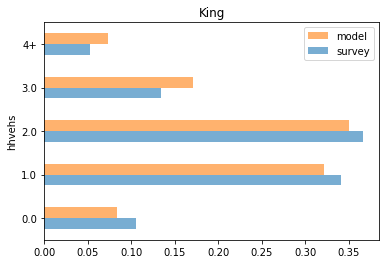

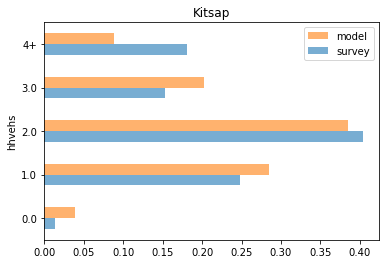

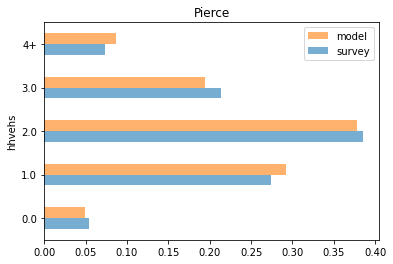

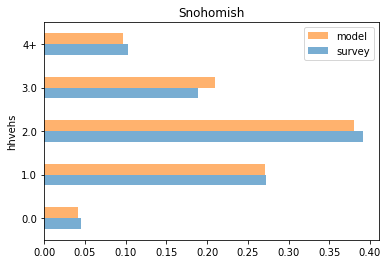

In [38]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [39]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,024,328    428  27,573    38,242
Kitsap         10,092 92,532   6,834       121
Pierce         94,246  6,234 246,335       337
Snohomish     157,163    119     295   215,814